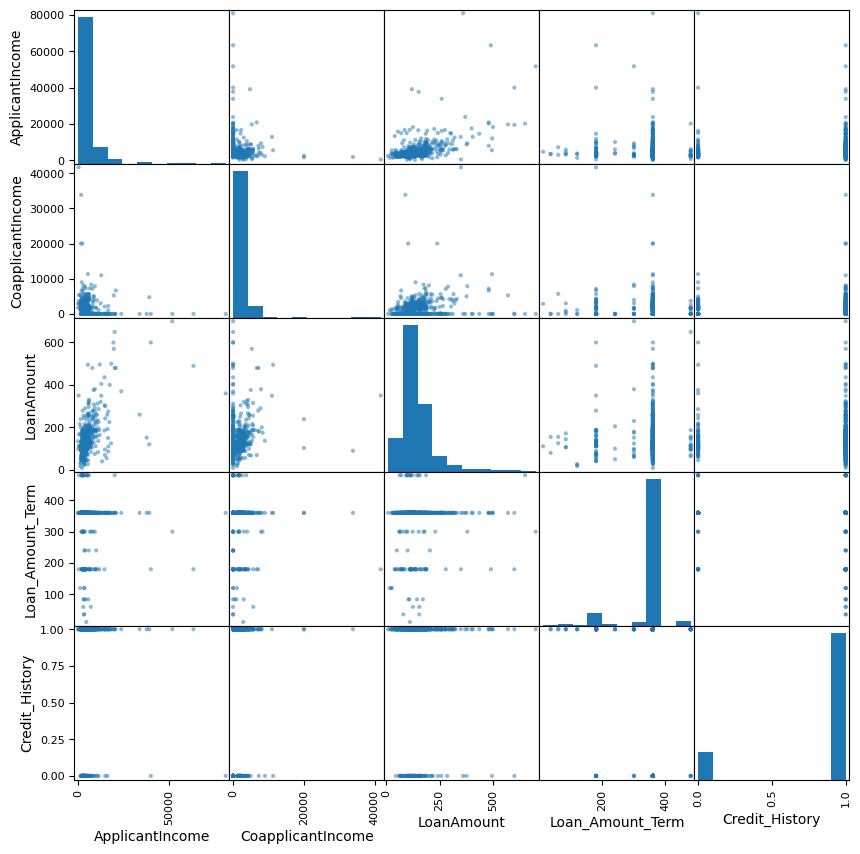

<Figure size 1200x1000 with 0 Axes>

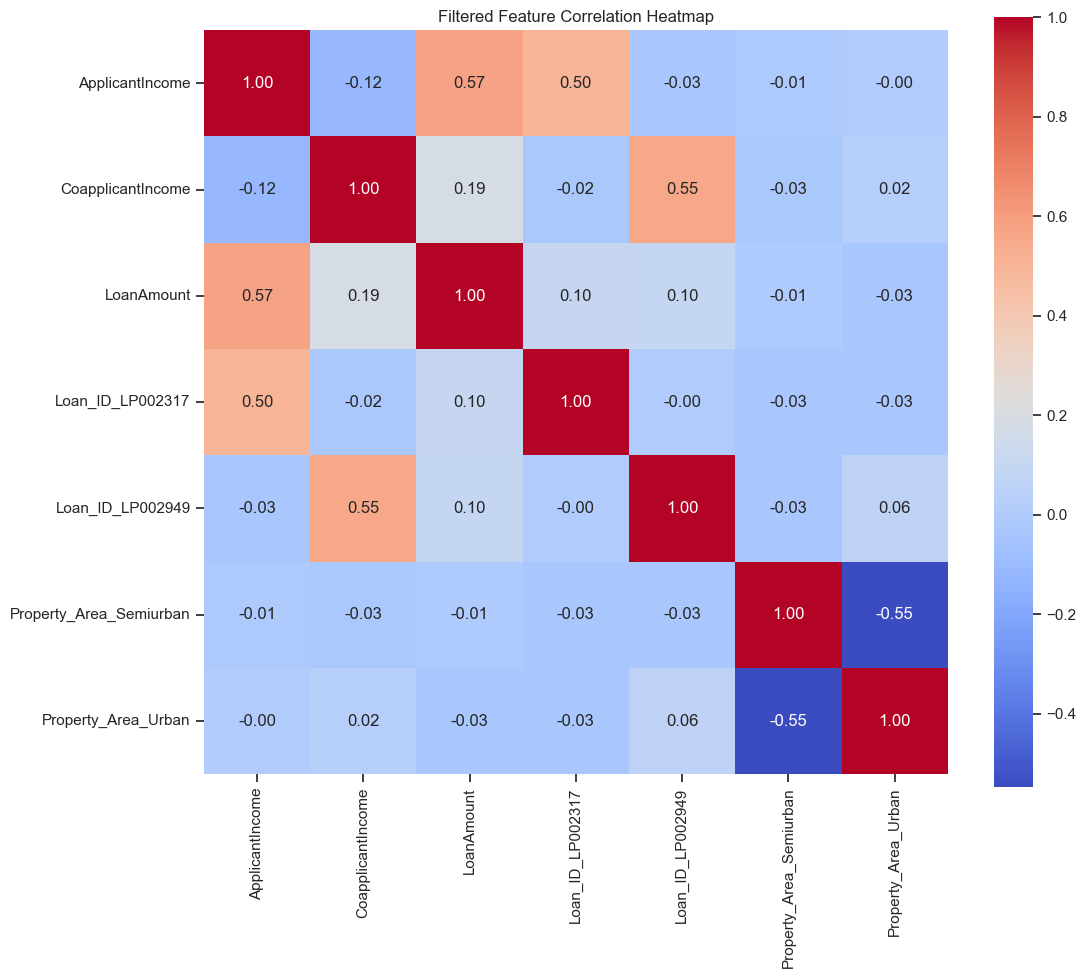

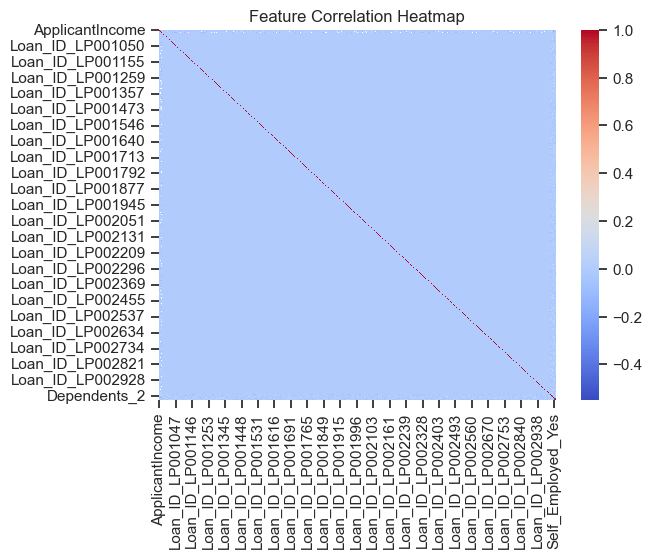

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error ,r2_score , mean_absolute_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ==============================
# Dataset Selection (Uncomment the desired dataset)
# ==============================

# 1. Breast Cancer Dataset (sklearn default):
# breast_cancer = load_breast_cancer()
# df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
# labels = breast_cancer.target

# # 2. External Breast Cancer Dataset (CSV):
# df = pd.read_csv("breast-cancer.csv")
# labels = df['diagnosis']  # Assuming 'diagnosis' is the correct column name
# df = df.drop(['diagnosis'], axis=1)

# 3. Red Wine Quality Dataset:
# df = pd.read_csv("winequality-red.csv", delimiter=",")
# labels = df['quality']
# df = df.drop(['quality'], axis=1)

# # 4. Housing Loan Approval Dataset:
df = pd.read_csv("loan_sanction_train.csv")
labels = df['Loan_Status']  # Assuming 'Loan_Status' is the target column
labels = LabelEncoder().fit_transform(labels)  # Encode categorical target
# Drop target column and preprocess categorical features
df = df.drop(['Loan_Status'], axis=1)
df = pd.get_dummies(df, drop_first=True)

# Exploratory Data Analysis for all 3
scatter_matrix(df.iloc[:, :5], figsize=(10, 10))  # Using first 5 features for visualization
plt.show()

sns.set(style="ticks", color_codes=True)
if 'species' in df.columns:
    sns.pairplot(df, hue='species')
plt.figure(figsize=(12, 10))

# #housing dataset ke liya
# # Calculate correlation matrix
# correlation_matrix = df.corr()

# # Filter features with a correlation greater than a threshold
# threshold = 0.5  # Adjust this value to include more features
# high_corr_var = (correlation_matrix.abs() > threshold).sum(axis=1) > 1
# filtered_corr_matrix = correlation_matrix.loc[high_corr_var, high_corr_var]

# # Ensure the filtered correlation matrix is not empty
# if not filtered_corr_matrix.empty:
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(
#         filtered_corr_matrix,
#         cmap='coolwarm',
#         annot=True,
#         fmt=".2f",
#         cbar=True,
#         square=True
#     )
#     plt.title('Filtered Feature Correlation Heatmap')
#     plt.show()
# else:
#     print("No features meet the correlation threshold. Try lowering the threshold.")

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# ==============================
# Preprocessing (Applies to all datasets , Except Bahar wala Breast cancer)
# ==============================

# Impute missing values and scale features
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed) # then phir train wala

# # ==============================
# # Preprocessing (Applies  Bahar wala Breast cancer)
# # ==============================

# # Encode categorical labels to numeric
# label_encoder = LabelEncoder()
# labels_encoded = label_encoder.fit_transform(labels)

# # Impute missing values
# imputer = SimpleImputer(strategy='mean')
# df_imputed = imputer.fit_transform(df)

# # Scale the imputed dataset
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_imputed)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42) # rest sabke liya
# X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels_encoded, test_size=0.2, random_state=42) # for bahar wala breast cancer

In [2]:
def find_s_algorithm(data, target):
    # Ensure data is a NumPy array
    if isinstance(data, pd.DataFrame):
        data = data.to_numpy()
    if isinstance(target, pd.Series):
        target = target.to_numpy()

    columnLength = data.shape[1]
    h = ['0'] * columnLength  # Maximally Specific Hypothesis

    for i in range(len(data)):  # Iterate over all examples
        if target[i] == 1:  # Positive example (ensure labels are numerical)
            for j in range(columnLength):
                if h[j] == '0':
                    h[j] = data[i][j]
                elif h[j] != data[i][j]:
                    h[j] = '?'
    return h
# Preprocess labels for consistency
if labels.dtype == 'object' or isinstance(labels[0], str):  # Check if labels are categorical
    labels = LabelEncoder().fit_transform(labels)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42)

# Apply the S algorithm
hypothesis = find_s_algorithm(X_train, y_train)
print("Maximally Specific Hypothesis (h):", hypothesis)

# Train and evaluate an SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy score
print("Accuracy of SVM Model:", accuracy_score(y_test, y_pred))


Maximally Specific Hypothesis (h): ['?', '?', '?', '?', '?', -0.04038961958610097, -0.04038961958610097, '?', '?', '?', -0.04038961958610097, -0.04038961958610097, '?', -0.04038961958610097, -0.04038961958610097, -0.04038961958610097, '?', -0.04038961958610097, '?', '?', '?', -0.04038961958610097, -0.04038961958610097, '?', -0.04038961958610097, '?', -0.04038961958610097, -0.04038961958610097, -0.04038961958610097, '?', '?', '?', -0.04038961958610097, -0.04038961958610097, -0.04038961958610097, -0.04038961958610097, -0.04038961958610097, '?', -0.04038961958610097, '?', -0.04038961958610097, '?', '?', -0.04038961958610097, -0.04038961958610097, '?', -0.04038961958610097, '?', '?', '?', '?', '?', -0.04038961958610097, '?', '?', '?', -0.04038961958610097, -0.04038961958610097, -0.04038961958610097, -0.04038961958610097, '?', -0.04038961958610097, '?', '?', -0.04038961958610097, '?', -0.04038961958610097, -0.04038961958610097, -0.04038961958610097, -0.04038961958610097, -0.0403896195861009